## Add - Example Codes
This code gives a brief example on how to
- select galaxies from the 'BlueTidesMockImageCatalogue.csv' file
- add noise to the images
- plot the noise-less and noisy images
This code can be used to reproduce the images in Figures 2 and 3 of the Mock Catalogue Release paper.


Note that the key functions can be found in add_noise.py if you wish to make any modifications. If add_noise and bluetides_mock_catalogue_functions is not in the current directory, you will need to add its directory to your PYTHONPATH.


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from astropy.io import fits

import bluetides_mock_catalogue_functions as mock_functions

Load in the catalogue as a Catalogue object. This requires specifying the directory which contains both the 'hlsp_bluetides_multi_multi_all_multi_v1_sim.csv' file and the catalogue fits images, 'image_path'. In this case we choose z=7.

In [11]:
z=7
cat=mock_functions.Catalogue(z=z,image_path='/home/mmarshal/FinalImages/FullCatalogue/')

In [12]:
cat.select_galaxies_with_indices([240,515,3701])

cat.catalogueSelected

,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,lum_FUV,flux_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,flux_vista.vircam.y,radius_vista.vircam.y,flux_vista.vircam.j,radius_vista.vircam.j,flux_vista.vircam.h,radius_vista.vircam.h,flux_vista.vircam.ks,radius_vista.vircam.ks,flux_spitzer.irac.ch1,flux_spitzer.irac.ch2
240,7.0,1,241,4.670138e+10,138758060.0,3.900770e+45,1.332076e+12,3.601339e+29,22.038994,1.265224,...,210.564529,2.300032,208.807938,2.300032,231.783096,2.241794,229.303848,2.241794,484.205200,523.094482
515,7.0,1,516,1.204752e+10,44596010.0,1.852940e+45,3.497844e+11,9.011230e+28,13.434932,1.143827,...,102.919060,2.057211,108.351852,2.057211,120.338409,2.057211,125.089157,1.991886,260.110931,297.770020
3701,7.0,1,3702,5.035402e+09,4998380.5,2.257284e+44,3.931238e+11,1.863760e+29,19.357805,1.312985,...,130.007187,2.120525,152.237396,2.120525,168.376709,2.120525,180.720215,2.057211,336.624664,374.237793


In [6]:
import add_noise

import importlib
importlib.reload(add_noise)


<module 'add_noise' from '/fred/oz183/mmarshal/codes/mockCatalogue/example_software/add_noise.py'>

In [7]:
image = add_noise.Image(cat,'jwst','nircam','f277w')
image.get_image_params()
image.open_fits()

ap_f_limit, ap_sig, ap_radius = add_noise.get_aperture_limits('jwst','~/FinalImages/')

Add 10ks of noise to the images

In [8]:
image.add_noise(10000, ap_f_limit, ap_sig, ap_radius)

14.16 0.16254000000000002


<IPython.core.display.Javascript object>


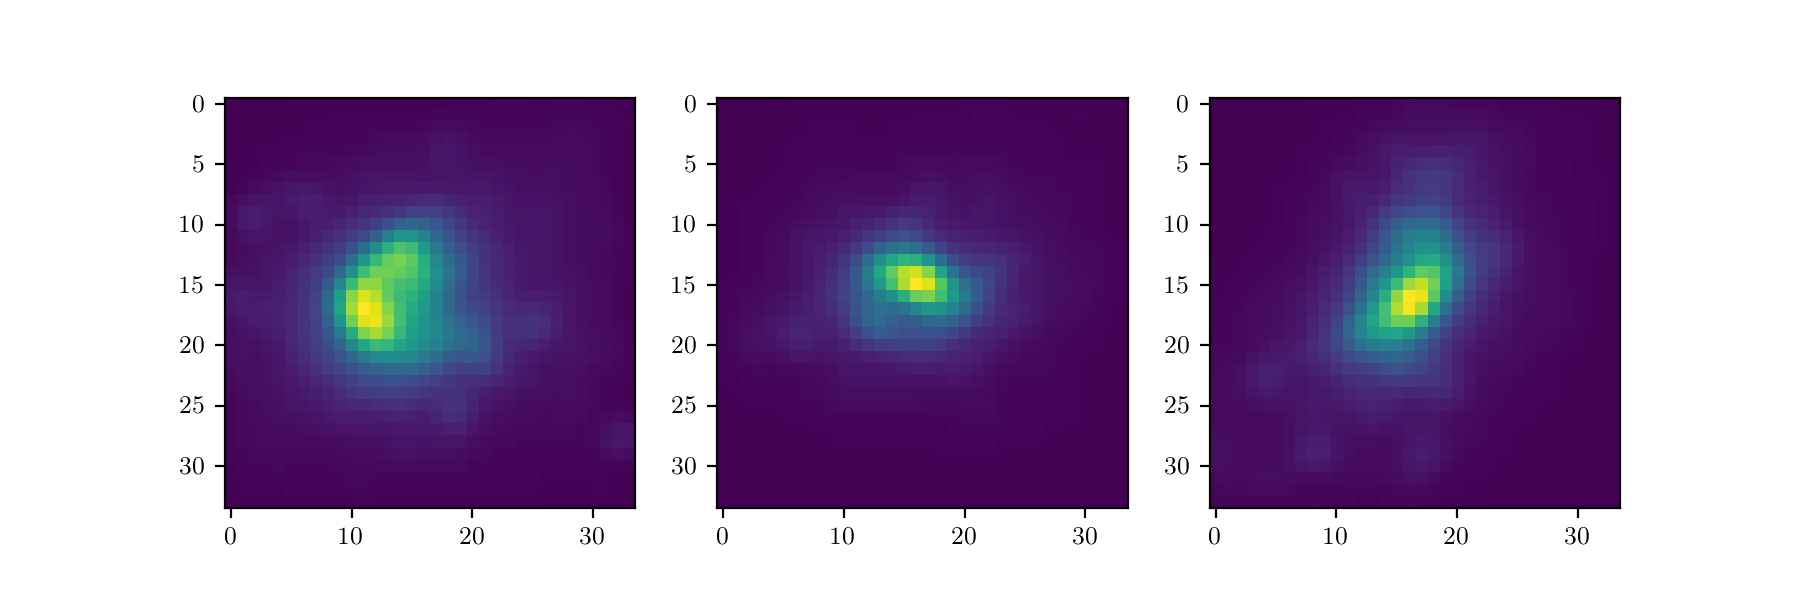

In [14]:
fig,ax=plt.subplots(1,3,figsize=(9,3))
for ii in range(0,image.catalogue.nGalsSelected):
    ax[ii].imshow(image.data[ii])

<IPython.core.display.Javascript object>


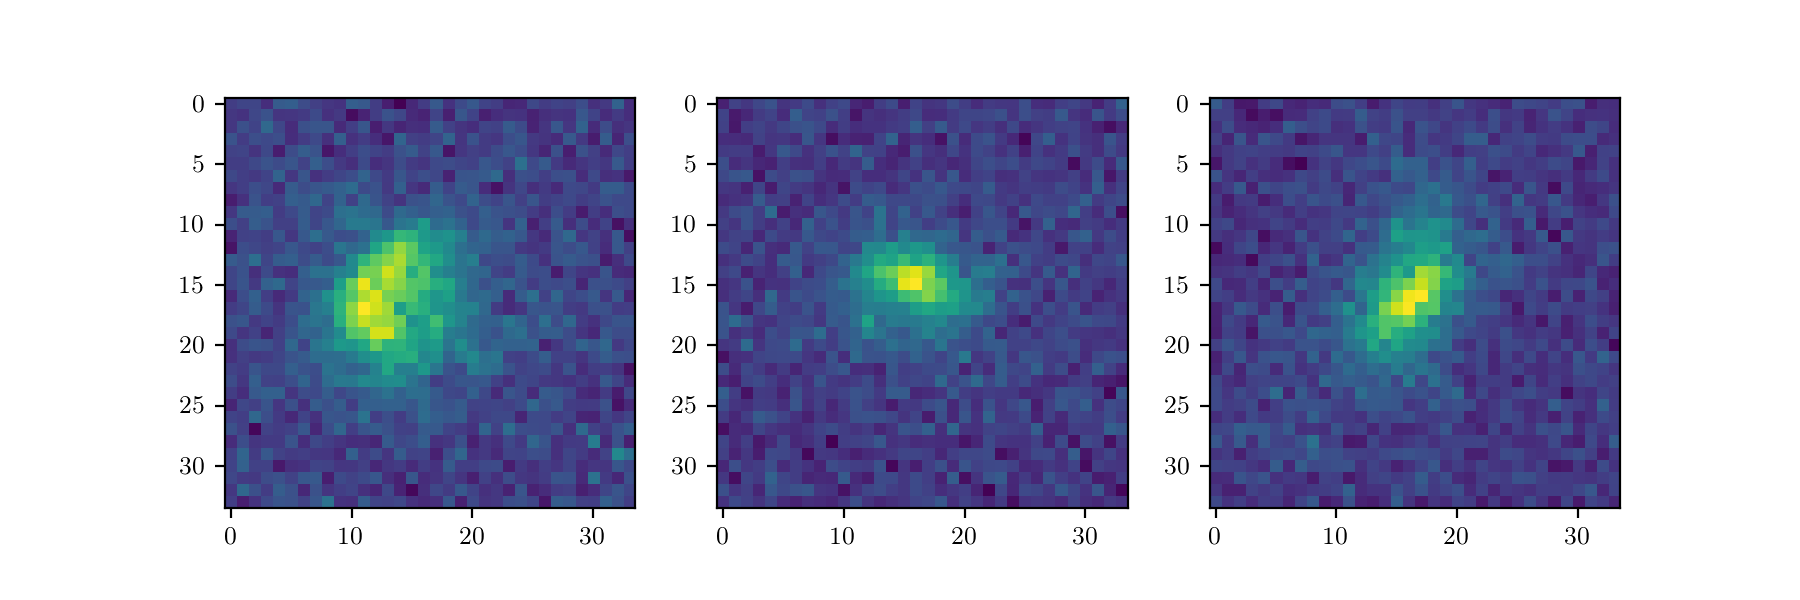

In [15]:
fig,ax=plt.subplots(1,3,figsize=(9,3))
for ii in range(0,image.catalogue.nGalsSelected):
    ax[ii].imshow(image.noisy_data[ii])